In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
encuenta = "survey.csv"
datos = pd.read_csv(encuenta)
print(datos.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [4]:
columnas_deseadas = ['Gender', 'Country', 'family_history', 'treatment', 'mental_health_consequence', 'phys_health_consequence']
datos_filtrados = datos.loc[:, columnas_deseadas]

print(datos_filtrados.head())

   Gender         Country family_history treatment mental_health_consequence  \
0  Female   United States             No       Yes                        No   
1       M   United States             No        No                     Maybe   
2    Male          Canada             No        No                        No   
3    Male  United Kingdom            Yes       Yes                       Yes   
4    Male   United States             No        No                        No   

  phys_health_consequence  
0                      No  
1                      No  
2                      No  
3                     Yes  
4                      No  


In [5]:
# Obtener los valores distintos de la columna 'Gender'
valores_gender = datos_filtrados['Gender'].unique()

# Mostrar los valores distintos
print("Valores distintos de la columna 'Gender':", valores_gender)


Valores distintos de la columna 'Gender': ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [6]:
# Agrupar los valores de género en categorías más generales
genero_categorias = {
    'Female': ['Female', 'female', 'F', 'f', 'Femake', 'woman', 'Femal', 'Cis Female', 'Woman', 'cis-female/femme', 'female ', 'cis female', 'Femail', 'femail', 'female (cis)'],
    'Male': ['Male', 'male', 'M', 'm', 'Make', 'Mal', 'Cis Male', 'Man', 'Cis Man', 'Mail', 'cis male', 'Male (CIS)', 'mal', 'maile', 'Malr', 'msle', 'Male '],
    'Transgender': ['Trans-female', 'Trans woman', 'Trans-female', 'Male-ish', 'Trans woman', 'Trans woman', 'Male (CIS)', 'queer/she/they', 'something kinda male?', 'queer', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'androgyne', 'agender', 'male leaning androgynous', 'neuter', 'female (trans)', 'ostensibly male, unsure what that really means', 'a little about you', 'p', 'cis-female/femme', 'guy (-ish) ^_^']
}

# Mapear los valores de género a las categorías más generales
datos_filtrados['Gender'] = datos_filtrados['Gender'].apply(lambda x: next((categoria for categoria, valores in genero_categorias.items() if x.lower() in valores), 'Other'))

# Verificar los valores únicos después de agrupar
print("Valores distintos de la columna 'Gender' después de agrupar:", datos_filtrados['Gender'].unique())

X = datos_filtrados.drop(columns=['treatment'])
y = datos_filtrados['treatment']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y prueba para verificar
print("Forma del conjunto de entrenamiento X:", X_train.shape)
print("Forma del conjunto de prueba X:", X_test.shape)
print("Forma del conjunto de entrenamiento y:", y_train.shape)
print("Forma del conjunto de prueba y:", y_test.shape)


Valores distintos de la columna 'Gender' después de agrupar: ['Female' 'Male' 'Other' 'Transgender']
Forma del conjunto de entrenamiento X: (1007, 5)
Forma del conjunto de prueba X: (252, 5)
Forma del conjunto de entrenamiento y: (1007,)
Forma del conjunto de prueba y: (252,)


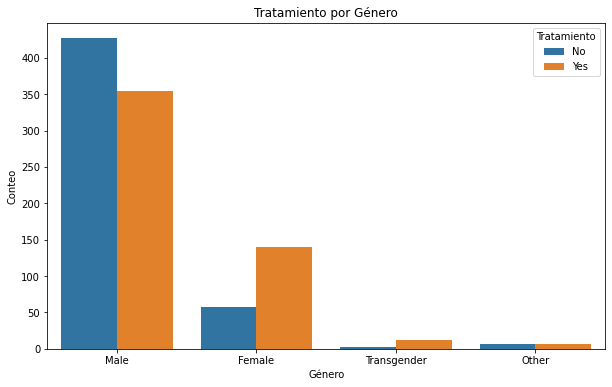

In [7]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un nuevo DataFrame combinando las variables X_train y y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Graficar
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Gender', hue='treatment')
plt.title('Tratamiento por Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.legend(title='Tratamiento', loc='upper right')
plt.show()



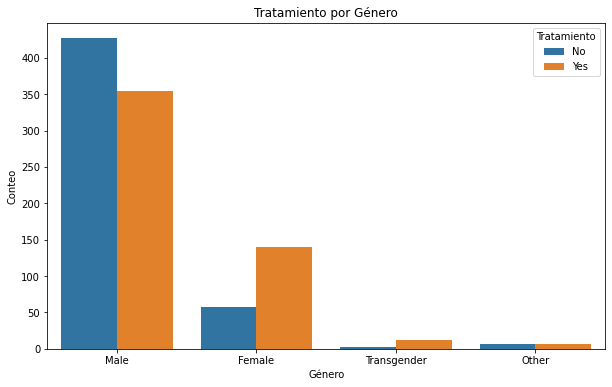

In [8]:
# Crear un nuevo DataFrame combinando las variables X_train y y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Graficar
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Gender', hue='treatment')
plt.title('Tratamiento por Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.legend(title='Tratamiento', loc='upper right')
plt.show()

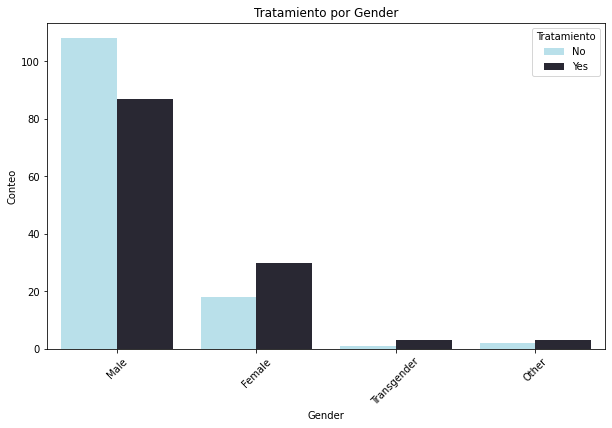

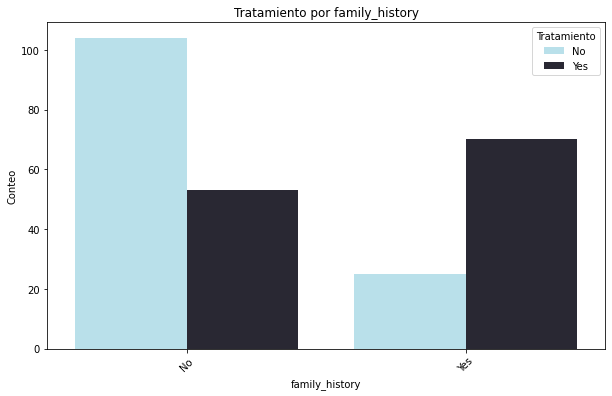

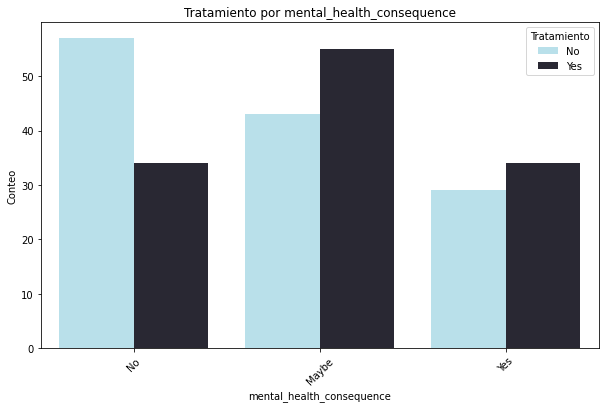

In [42]:
# Lista de columnas categóricas restantes
columnas_categoricas = ['Gender', 'family_history', 'mental_health_consequence']
custom_palette = {'No': '#B1E5F2', 'Yes': '#272635'}
test_data = pd.concat([X_test, y_test], axis=1)

# Graficar para cada columna categórica
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=test_data, x=columna, hue='treatment', palette=custom_palette)
    plt.title(f'Tratamiento por {columna}')
    plt.xlabel(columna)
    plt.ylabel('Conteo')
    plt.legend(title='Tratamiento', loc='upper right')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad si es necesario
    plt.show()


In [10]:
# Calcular la cantidad total de casos 'Yes' en tratamiento para cada categoría de las columnas categóricas
for columna in columnas_categoricas:
    conteo_por_categoria = train_data[train_data['treatment'] == 'Yes'].groupby(columna)['treatment'].count()
    print(f"Conteo de 'Yes' en tratamiento por {columna}:\n{conteo_por_categoria}\n")


Conteo de 'Yes' en tratamiento por Gender:
Gender
Female         140
Male           355
Other            7
Transgender     12
Name: treatment, dtype: int64

Conteo de 'Yes' en tratamiento por Country:
Country
Australia          11
Bahamas, The        1
Belgium             1
Brazil              1
Bulgaria            1
Canada             32
Croatia             2
Denmark             2
Finland             1
France              1
Germany            17
India               3
Ireland            12
Italy               1
Japan               1
Mexico              1
Moldova             1
Netherlands         6
New Zealand         5
Poland              4
Singapore           1
Slovenia            1
South Africa        4
Sweden              2
Switzerland         3
United Kingdom     75
United States     323
Zimbabwe            1
Name: treatment, dtype: int64

Conteo de 'Yes' en tratamiento por family_history:
family_history
No     219
Yes    295
Name: treatment, dtype: int64

Conteo de 'Yes' en tratam

In [11]:
# Calcular la cantidad total de casos 'Yes' en tratamiento para cada categoría de las columnas categóricas
for columna in columnas_categoricas:
    conteo_por_categoria = train_data[train_data['treatment'] == 'No'].groupby(columna)['treatment'].count()
    print(f"Conteo de 'No' en tratamiento por {columna}:\n{conteo_por_categoria}\n")

Conteo de 'No' en tratamiento por Gender:
Gender
Female          58
Male           427
Other            6
Transgender      2
Name: treatment, dtype: int64

Conteo de 'No' en tratamiento por Country:
Country
Australia                   8
Austria                     2
Belgium                     3
Bosnia and Herzegovina      1
Brazil                      3
Bulgaria                    1
Canada                     29
China                       1
Colombia                    1
Costa Rica                  1
Czech Republic              1
Finland                     1
France                      9
Georgia                     1
Germany                    18
Greece                      2
Hungary                     1
India                       5
Ireland                    12
Israel                      4
Italy                       6
Latvia                      1
Mexico                      2
Netherlands                12
New Zealand                 3
Nigeria                     1
Norway       

In [12]:
test_data = pd.concat([X_test, y_test], axis=1)

# Calcular el conteo de cada clase de cada columna categórica en train_data
for columna in test_data.columns:
    if test_data[columna].dtype == 'object':
        conteo_clases = test_data[columna].value_counts()
        print(f"Conteo de clases para la columna '{columna}':\n{conteo_clases}\n")


Conteo de clases para la columna 'Gender':
Male           195
Female          48
Other            5
Transgender      4
Name: Gender, dtype: int64

Conteo de clases para la columna 'Country':
United States     157
United Kingdom     34
Canada             11
Germany            10
Netherlands         9
Ireland             3
France              3
Singapore           3
Switzerland         3
India               2
Belgium             2
Russia              2
Brazil              2
Sweden              2
Bulgaria            2
Australia           2
Colombia            1
Austria             1
Finland             1
Israel              1
Spain               1
Name: Country, dtype: int64

Conteo de clases para la columna 'family_history':
No     157
Yes     95
Name: family_history, dtype: int64

Conteo de clases para la columna 'mental_health_consequence':
Maybe    98
No       91
Yes      63
Name: mental_health_consequence, dtype: int64

Conteo de clases para la columna 'phys_health_consequence':
No  

In [13]:
sim = pd.DataFrame(columns=['Gender', 'family_history', 'mental_health_consequence', 'treatment'], index=range(252))

sim.loc[:128, 'treatment']='No'
sim.loc[129:251, 'treatment']='Yes'

print(sim)

    Gender family_history mental_health_consequence treatment
0      NaN            NaN                       NaN        No
1      NaN            NaN                       NaN        No
2      NaN            NaN                       NaN        No
3      NaN            NaN                       NaN        No
4      NaN            NaN                       NaN        No
..     ...            ...                       ...       ...
247    NaN            NaN                       NaN       Yes
248    NaN            NaN                       NaN       Yes
249    NaN            NaN                       NaN       Yes
250    NaN            NaN                       NaN       Yes
251    NaN            NaN                       NaN       Yes

[252 rows x 4 columns]


In [24]:
# Proporciones
proporciones = [27755/33626, 464/4257, 10/559, 4/903]
proporciones = [prop / sum(proporciones) for prop in proporciones]  # Normalizar las proporciones para que sumen 1

# Asignar valores a las filas donde 'treatment' es 'No'
sim.loc[sim['treatment'] == 'No', 'Gender'] = np.random.choice(['Male', 'Female', 'Other', 'Transgender'], size=sum(sim['treatment'] == 'No'), p=proporciones)

# Imprimir el DataFrame
print(sim)

    Gender family_history mental_health_consequence treatment
0     Male            NaN                       NaN        No
1     Male            NaN                       NaN        No
2    Other            NaN                       NaN        No
3     Male            NaN                       NaN        No
4     Male            NaN                       NaN        No
..     ...            ...                       ...       ...
247    NaN            NaN                       NaN       Yes
248    NaN            NaN                       NaN       Yes
249    NaN            NaN                       NaN       Yes
250    NaN            NaN                       NaN       Yes
251    NaN            NaN                       NaN       Yes

[252 rows x 4 columns]


In [29]:
proporciones_yes = [11360/16031, 1120/4059, 35/1599, 8/287]
proporciones_yes = [prop / sum(proporciones_yes) for prop in proporciones_yes]  # Normalizar las proporciones para que sumen 1

# Asignar valores a las filas donde 'treatment' es 'Yes'
sim.loc[sim['treatment'] == 'Yes', 'Gender'] = np.random.choice(['Male', 'Female', 'Other', 'Transgender'], size=sum(sim['treatment'] == 'Yes'), p=proporciones_yes)

# Imprimir el DataFrame
print(sim)

     Gender family_history mental_health_consequence treatment
0      Male            NaN                       NaN        No
1      Male            NaN                       NaN        No
2     Other            NaN                       NaN        No
3      Male            NaN                       NaN        No
4      Male            NaN                       NaN        No
..      ...            ...                       ...       ...
247    Male            NaN                       NaN       Yes
248    Male            NaN                       NaN       Yes
249    Male            NaN                       NaN       Yes
250  Female            NaN                       NaN       Yes
251  Female            NaN                       NaN       Yes

[252 rows x 4 columns]


In [30]:
# Proporciones para 'No'
proporciones_no = [61387/78690, 3230/17071]
proporciones_no = [prop / sum(proporciones_no) for prop in proporciones_no]  # Normalizar las proporciones para que sumen 1

# Asignar valores a las filas donde 'treatment' es 'No'
sim.loc[sim['treatment'] == 'No', 'family_history'] = np.random.choice(['No', 'Yes'], size=sum(sim['treatment'] == 'No'), p=proporciones_no)

# Imprimir el DataFrame
print(sim)

     Gender family_history mental_health_consequence treatment
0      Male             No                       NaN        No
1      Male             No                       NaN        No
2     Other            Yes                       NaN        No
3      Male             No                       NaN        No
4      Male            Yes                       NaN        No
..      ...            ...                       ...       ...
247    Male            NaN                       NaN       Yes
248    Male            NaN                       NaN       Yes
249    Male            NaN                       NaN       Yes
250  Female            NaN                       NaN       Yes
251  Female            NaN                       NaN       Yes

[252 rows x 4 columns]


In [31]:
proporciones_yes_fh = [11461/25010, 28025/48831]
proporciones_yes_fh = [prop / sum(proporciones_yes_fh) for prop in proporciones_yes_fh]  # Normalizar las proporciones para que sumen 1

# Asignar valores a las filas donde 'treatment' es 'Yes'
sim.loc[sim['treatment'] == 'Yes', 'family_history'] = np.random.choice(['No', 'Yes'], size=sum(sim['treatment'] == 'Yes'), p=proporciones_yes_fh)

# Imprimir el DataFrame
print(sim)

     Gender family_history mental_health_consequence treatment
0      Male             No                       NaN        No
1      Male             No                       NaN        No
2     Other            Yes                       NaN        No
3      Male             No                       NaN        No
4      Male            Yes                       NaN        No
..      ...            ...                       ...       ...
247    Male             No                       NaN       Yes
248    Male            Yes                       NaN       Yes
249    Male            Yes                       NaN       Yes
250  Female            Yes                       NaN       Yes
251  Female            Yes                       NaN       Yes

[252 rows x 4 columns]


In [32]:
proporciones_no_mhc = [17738/48891, 2899/7353, 1869/9847]
proporciones_no_mhc = [prop / sum(proporciones_no_mhc) for prop in proporciones_no_mhc]  # Normalizar las proporciones para que sumen 1

# Asignar valores a las filas donde 'treatment' es 'No'
sim.loc[sim['treatment'] == 'No', 'mental_health_consequence'] = np.random.choice(['Maybe', 'No', 'Yes'], size=sum(sim['treatment'] == 'No'), p=proporciones_no_mhc)

# Imprimir el DataFrame
print(sim)

     Gender family_history mental_health_consequence treatment
0      Male             No                        No        No
1      Male             No                        No        No
2     Other            Yes                     Maybe        No
3      Male             No                     Maybe        No
4      Male            Yes                       Yes        No
..      ...            ...                       ...       ...
247    Male             No                       NaN       Yes
248    Male            Yes                       NaN       Yes
249    Male            Yes                       NaN       Yes
250  Female            Yes                       NaN       Yes
251  Female            Yes                       NaN       Yes

[252 rows x 4 columns]


In [33]:
# Proporciones para 'Yes'
proporciones_yes_mhc = [6468/15539, 2288/7011, 2940/9389]
proporciones_yes_mhc = [prop / sum(proporciones_yes_mhc) for prop in proporciones_yes_mhc]  # Normalizar las proporciones para que sumen 1

# Asignar valores a las filas donde 'treatment' es 'Yes'
sim.loc[sim['treatment'] == 'Yes', 'mental_health_consequence'] = np.random.choice(['Maybe', 'No', 'Yes'], size=sum(sim['treatment'] == 'Yes'), p=proporciones_yes_mhc)

# Imprimir el DataFrame
print(sim)

     Gender family_history mental_health_consequence treatment
0      Male             No                        No        No
1      Male             No                        No        No
2     Other            Yes                     Maybe        No
3      Male             No                     Maybe        No
4      Male            Yes                       Yes        No
..      ...            ...                       ...       ...
247    Male             No                        No       Yes
248    Male            Yes                        No       Yes
249    Male            Yes                     Maybe       Yes
250  Female            Yes                     Maybe       Yes
251  Female            Yes                        No       Yes

[252 rows x 4 columns]


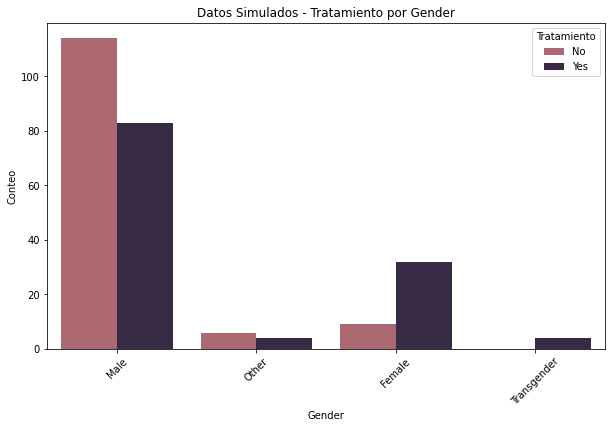

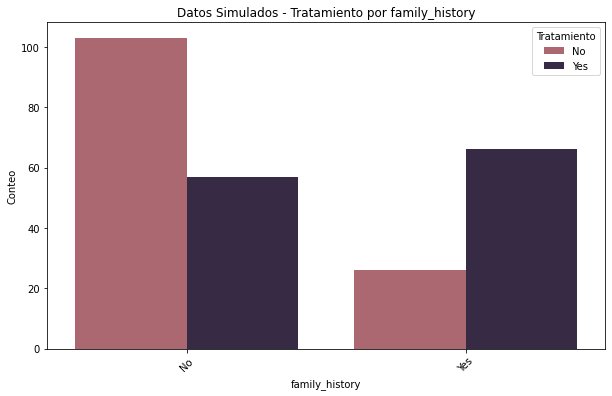

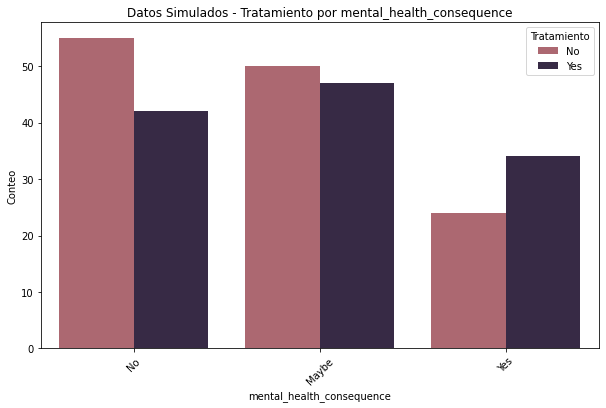

In [38]:
# Lista de columnas categóricas restantes
columnas_categoricas = ['Gender', 'family_history', 'mental_health_consequence']
custom_palette = {'No': '#B75D69', 'Yes': '#372549'}

# Graficar para cada columna categórica
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=sim, x=columna, hue='treatment', palette=custom_palette)
    plt.title(f'Datos Simulados - Tratamiento por {columna}')
    plt.xlabel(columna)
    plt.ylabel('Conteo')
    plt.legend(title='Tratamiento', loc='upper right')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad si es necesario
    plt.show()

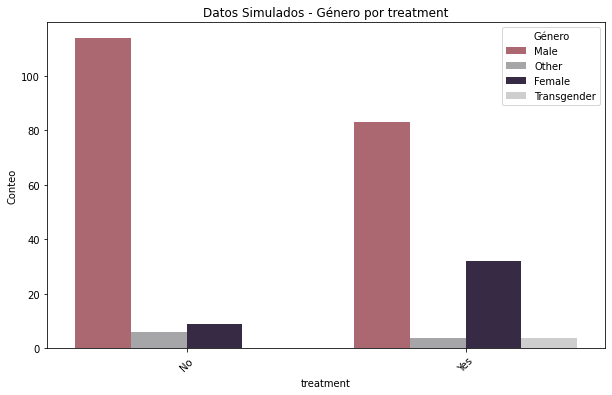

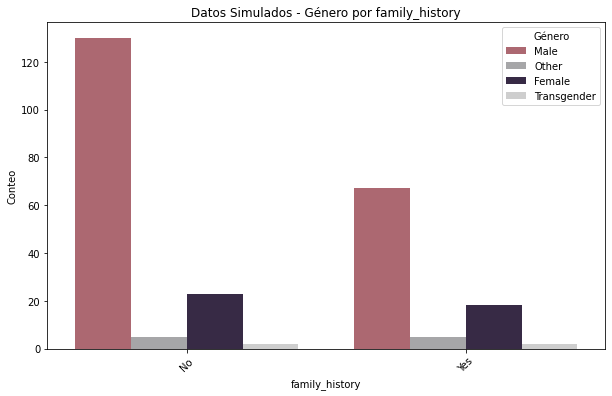

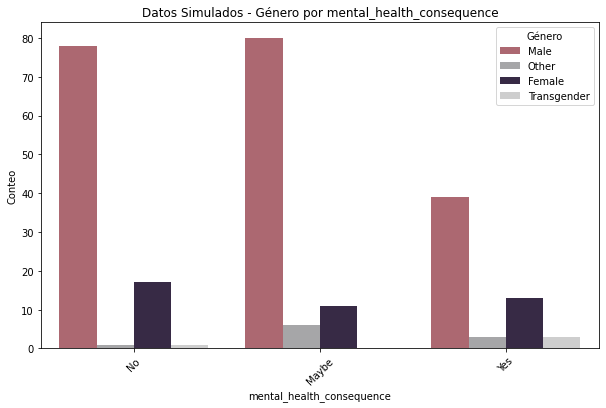

In [56]:
# Lista de columnas categóricas restantes
columnas_categoricas = ['treatment', 'family_history', 'mental_health_consequence']
#custom_palette = {'No': '#B75D69', 'Yes': '#372549'}
custom_palette = {'Male': '#B75D69', 'Female': '#372549', 'Transgender':'#CECECE', 'Other':'#A6A6A8'}

# Graficar para cada columna categórica
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=sim, x=columna, hue='Gender', palette=custom_palette)
    plt.title(f'Datos Simulados - Género por {columna}')
    plt.xlabel(columna)
    plt.ylabel('Conteo')
    plt.legend(title='Género', loc='upper right')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad si es necesario
    plt.show()

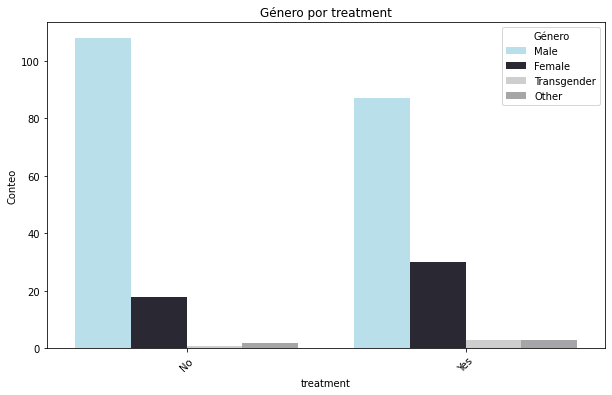

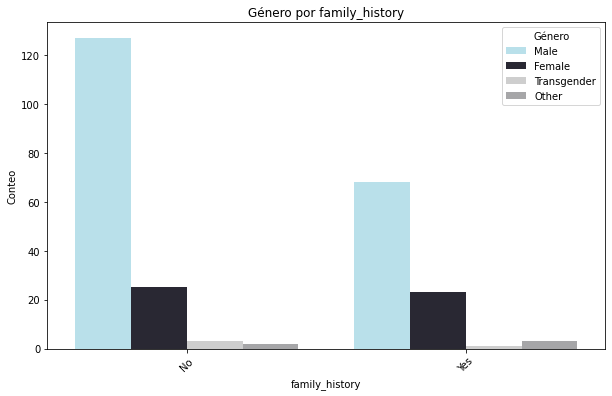

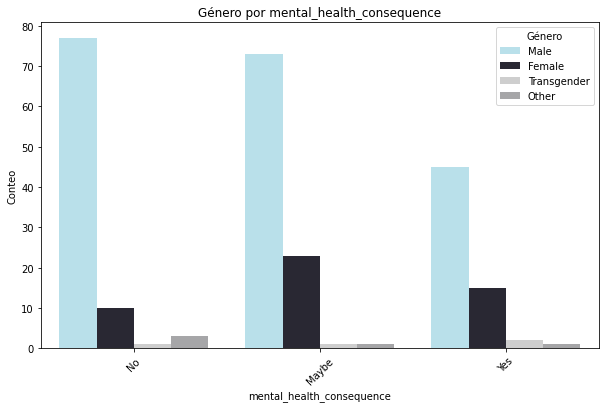

In [55]:
# Lista de columnas categóricas restantes
columnas_categoricas = ['treatment', 'family_history', 'mental_health_consequence']
custom_palette = {'Male': '#B1E5F2', 'Female': '#272635', 'Transgender':'#CECECE', 'Other':'#A6A6A8'}

# Graficar para cada columna categórica
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=test_data, x=columna, hue='Gender', palette=custom_palette)
    plt.title(f'Género por {columna}')
    plt.xlabel(columna)
    plt.ylabel('Conteo')
    plt.legend(title='Género', loc='upper right')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad si es necesario
    plt.show()